In [54]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime
import ta

In [154]:
import torch
import torch.nn as nn
import torch.optim as optim

In [110]:
"""
Download the stock data from Yahoo Finance
"""
ticker = "AAPL"

end_date = datetime.now().strftime("%Y-%m-%d")
start_date = pd.to_datetime(end_date) - pd.DateOffset(years=10)

df = yf.download(tickers=ticker, start=start_date, end=end_date).stack()

df.head()

[*********************100%***********************]  1 of 1 completed
/var/folders/zy/64gtqsbx4ts83dlyf7nwkjg00000gn/T/ipykernel_29738/654771145.py:9: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  df = yf.download(tickers=ticker, start=start_date, end=end_date).stack()


,Price,Close,High,Low,Open,Volume
Date,Ticker,,,,,
2015-01-05,AAPL,23.661274,24.195741,23.474212,24.115571,257142000
2015-01-06,AAPL,23.663504,23.924056,23.300511,23.725858,263188400
2015-01-07,AAPL,23.995319,24.095531,23.761490,23.872837,160423600
2015-01-08,AAPL,24.917273,24.975174,24.206877,24.324906,237458000
2015-01-09,AAPL,24.943996,25.220137,24.543146,25.090974,214798000


In [55]:
indicator_bb = ta.volatility.BollingerBands(close=df["Close"], window=20, window_dev=2)

In [111]:
import ta.momentum
import ta.trend

df['BBMA'] = indicator_bb.bollinger_mavg()
df['BBH'] = indicator_bb.bollinger_hband()
df['BBL'] = indicator_bb.bollinger_lband()
df['EMAF'] = ta.trend.sma_indicator(df["Close"], window=50)
df['EMAM'] = ta.trend.sma_indicator(df["Close"], window=100)
df['EMAS'] = ta.trend.sma_indicator(df["Close"], window=150)
df['RSI'] = ta.momentum.rsi(df["Close"], fillna=True)
df['MACD'] = ta.trend.macd(df["Close"], window_slow=20)

df['TargetNextClose'] = df['Close'].shift(-1)

df.head(30)

,Price,Close,High,Low,Open,Volume,BBMA,BBH,BBL,EMAF,EMAM,EMAS,RSI,MACD,TargetNextClose
Date,Ticker,,,,,,,,,,,,,,
2015-01-05,AAPL,23.661274,24.195741,23.474212,24.115571,257142000,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,NaN,23.663504
2015-01-06,AAPL,23.663504,23.924056,23.300511,23.725858,263188400,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,NaN,23.995319
2015-01-07,AAPL,23.995319,24.095531,23.761490,23.872837,160423600,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,NaN,24.917273
2015-01-08,AAPL,24.917273,24.975174,24.206877,24.324906,237458000,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,NaN,24.943996
2015-01-09,AAPL,24.943996,25.220137,24.543146,25.090974,214798000,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,NaN,24.329359
2015-01-12,AAPL,24.329359,25.082065,24.229147,25.075385,198603200,NaN,NaN,NaN,NaN,NaN,NaN,63.881611,NaN,24.545364
2015-01-13,AAPL,24.545364,25.119916,24.253635,24.814824,268367600,NaN,NaN,NaN,NaN,NaN,NaN,68.225135,NaN,24.451836
2015-01-14,AAPL,24.451836,24.605494,24.162332,24.282587,195826400,NaN,NaN,NaN,NaN,NaN,NaN,64.602469,NaN,23.788208
2015-01-15,AAPL,23.788208,24.509737,23.752578,24.496376,240056000,NaN,NaN,NaN,NaN,NaN,NaN,45.956196,NaN,23.603369


In [112]:
df.dropna(inplace=True)
df.reset_index(inplace=True)

df = df.drop(columns=["Ticker", "Volume"])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2366 entries, 0 to 2365
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             2366 non-null   datetime64[ns]
 1   Close            2366 non-null   float64       
 2   High             2366 non-null   float64       
 3   Low              2366 non-null   float64       
 4   Open             2366 non-null   float64       
 5   BBMA             2366 non-null   float64       
 6   BBH              2366 non-null   float64       
 7   BBL              2366 non-null   float64       
 8   EMAF             2366 non-null   float64       
 9   EMAM             2366 non-null   float64       
 10  EMAS             2366 non-null   float64       
 11  RSI              2366 non-null   float64       
 12  MACD             2366 non-null   float64       
 13  TargetNextClose  2366 non-null   float64       
dtypes: datetime64[ns](1), float64(13)
memory

In [104]:
# using the GPU
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [128]:
data_set = df.iloc[:, 1:]

data_set

Price,Close,High,Low,Open,BBMA,BBH,BBL,EMAF,EMAM,EMAS,RSI,MACD,TargetNextClose
0,26.052454,26.217087,25.822421,25.840463,27.691874,29.956587,25.427161,28.196225,28.370130,27.842872,31.532196,-0.430206,26.999657
1,26.999657,27.060547,26.280237,26.280237,27.631279,29.901974,25.360584,28.151242,28.352902,27.865128,44.815564,-0.379764,25.594641
2,25.594641,26.652346,25.558558,26.568901,27.500994,29.920286,25.081702,28.076992,28.323793,27.878002,34.212533,-0.417928,25.989309
3,25.989309,26.029904,24.724123,25.378141,27.376860,29.838527,24.915193,28.013239,28.302207,27.891296,38.606526,-0.417891,25.969011
4,25.969011,26.250915,25.831442,26.169727,27.232740,29.669598,24.795883,27.948362,28.277490,27.898307,38.464234,-0.412930,26.151684
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2361,258.200012,258.209991,255.289993,255.490005,246.293500,259.058756,233.528244,235.823014,229.609709,223.779883,75.750264,3.791185,259.019989
2362,259.019989,260.100006,257.630005,258.190002,247.491499,260.312004,234.670995,236.331553,230.111926,224.236884,76.452865,3.931823,255.589996
2363,255.589996,258.700012,253.059998,257.829987,248.524500,260.426425,236.622574,236.812848,230.600197,224.697759,67.626261,3.780857,252.199997
2364,252.199997,253.500000,250.750000,252.229996,249.267999,260.088496,238.447502,237.218951,231.028726,225.115413,60.225576,3.411204,250.419998


In [129]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
sc_data_set = sc.fit_transform(data_set)

print(sc_data_set)

[[0.02247032 0.02181158 0.02245363 ... 0.15075225 0.39580074 0.02644478]
 [0.02644478 0.02533926 0.02438426 ... 0.34142579 0.4010534  0.02054934]
 [0.02054934 0.023632   0.0213409  ... 0.18922662 0.39707928 0.02220537]
 ...
 [0.98560778 0.99414469 0.98072801 ... 0.66885752 0.83430956 0.97138337]
 [0.97138337 0.97239623 0.97098661 ... 0.56262582 0.79581664 0.96391452]
 [0.96391452 0.9714761  0.96542006 ... 0.51224694 0.7502797  0.93634689]]


In [191]:
X = []

backcandles = 30

for j in range(12): 
    X.append([])
    for i in range(backcandles, sc_data_set.shape[0]): 
        X[j].append(sc_data_set[i-backcandles:i, j])

X = np.moveaxis(X, [0], [2])

X, yi = np.array(X), np.array(sc_data_set[backcandles:, -1])
y = np.reshape(yi, (len(yi), 1))

print(X.shape)
print(y.shape)


(2336, 30, 12)
(2336, 1)


In [192]:
def TrainTest(x, prop=0.90): 
    I = int(prop * len(x))
    train = x[:I]
    test = x[I:]
    return train, test

In [193]:
X_train, X_test = TrainTest(X)
y_train, y_test = TrainTest(y)

X_train = torch.tensor(X_train).float()
y_train = torch.tensor(y_train).float()
X_test = torch.tensor(X_test).float()
y_test = torch.tensor(y_test).float()

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

torch.Size([2102, 30, 12])
torch.Size([234, 30, 12])
torch.Size([2102, 1])
torch.Size([234, 1])


In [174]:
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        
        # Define the LSTM layer
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        
        # Fully connected layer for output
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        # Initialize hidden state and cell state
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        
        # Pass through LSTM
        out, _ = self.lstm(x, (h0, c0))
        
        # Fully connected layer
        out = self.fc(out[:, -1, :])  # Take last output
        return out

In [194]:
# Hyperparameters
input_size = X_train.shape[2] 
hidden_size = 64
num_layers = 2
output_size = 1
num_epochs = 1000
learning_rate = 0.01

In [195]:
# Initialize model, loss function, and optimizer
model = LSTMModel(input_size, hidden_size, num_layers, output_size)
model.to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(num_epochs):
    model.train()
    
    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if epoch % 100 == 0:
        print(f'Epoch [{epoch + 100}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [100/1000], Loss: 0.1244
Epoch [200/1000], Loss: 0.0002
Epoch [300/1000], Loss: 0.0002
Epoch [400/1000], Loss: 0.0001
Epoch [500/1000], Loss: 0.0001
Epoch [600/1000], Loss: 0.0001
Epoch [700/1000], Loss: 0.0001
Epoch [800/1000], Loss: 0.0001
Epoch [900/1000], Loss: 0.0001
Epoch [1000/1000], Loss: 0.0001


In [196]:
model.eval()
with torch.no_grad():
    predictions = model(X_test)
    print(f"Test Predictions Shape: {predictions.shape}")

Test Predictions Shape: torch.Size([234, 1])


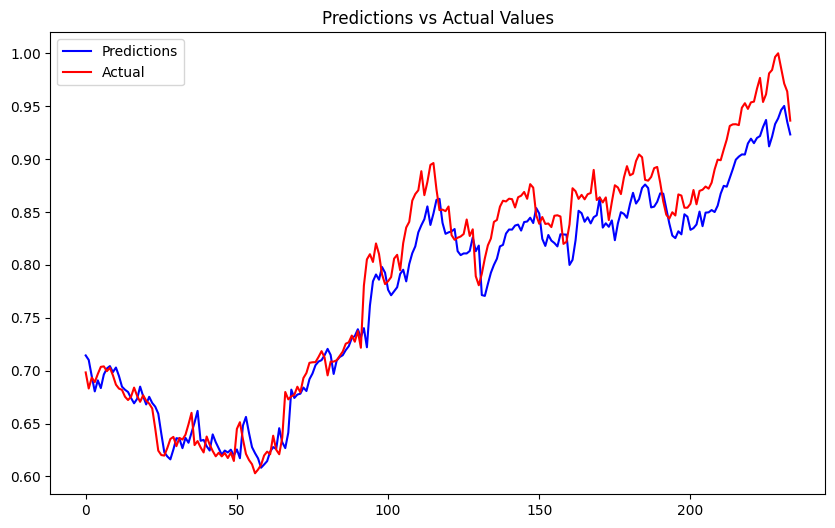

In [197]:
# Convert predictions and targets back to NumPy
predictions = predictions.numpy()
y_test = y_test.numpy()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(predictions, label="Predictions", color="blue")
plt.plot(y_test, label="Actual", color="red")
plt.legend()
plt.title("Predictions vs Actual Values")
plt.show()